In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import pyarrow as pa
# import pyarrow.parquet as pq
import os
import random
# import matrixprofile as mp
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import statistics
from collections import Counter
import os
from collections import OrderedDict
from scipy import stats
import scikit_posthocs as sp
from scipy.stats import wilcoxon
sns.set_style("whitegrid")

In [29]:
tempTopDir = '/Volumes/Britt_SSD/ReDoEvals3/UserStudy/'
filePath = os.path.join(tempTopDir, 'GP_Main.parquet')
save_path = '/Users/brittdavis/iCloud/Documents/School/Thesis/Stimuli_PostFeedback/'



In [3]:
taskDF = pd.read_parquet(filePath)
taskDF['ParticipantNum'] = taskDF["ParticipantPrivateID"]
taskDF = taskDF.astype({"ParticipantPrivateID": str})
filePath = os.path.join(tempTopDir, 'GP_Main_Short.parquet')
slimDF = pd.read_parquet(filePath)

In [4]:
likertSlim = pd.read_parquet(os.path.join(tempTopDir, 'likertSlim_corrected.parquet'))

In [5]:
lookup = taskDF[["VisCond_DIFF","VisCond_EASY"]].notnull().idxmax(1)
taskDF = taskDF.assign(VisCond=taskDF.lookup(lookup.index, lookup.values))
taskDF['VisCond']

/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  


index
0        Blur_Plus_Vis
1        Blur_Plus_Vis
2        Blur_Plus_Vis
3        Blur_Plus_Vis
4        Blur_Plus_Vis
             ...      
75810          Blurred
75811          Blurred
75812          Blurred
75813          Blurred
75814          Blurred
Name: VisCond, Length: 75676, dtype: object

In [6]:
lookup = taskDF[["AgentCond_BlurVis_DIFF","AgentCond_Blur_DIFF","AgentCond_Vis_DIFF","AgentCond_Norm_DIFF",
                 "AgentCond_BlurVis_EASY","AgentCond_Blur_EASY","AgentCond_Vis_EASY","AgentCond_Norm_EASY"]].notnull().idxmax(1)
taskDF = taskDF.assign(AgentCond=taskDF.lookup(lookup.index, lookup.values))
taskDF['AgentCond']

/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  This is separate from the ipykernel package so we can avoid doing imports until


index
0        300_700
1        300_700
2        300_700
3        300_700
4        300_700
          ...   
75810    300_700
75811    300_700
75812    300_700
75813    300_700
75814    300_700
Name: AgentCond, Length: 75676, dtype: object

In [7]:
filePath = os.path.join(tempTopDir, 'GP_Consent_Long.parquet')
consentDF_L = pd.read_parquet(filePath).infer_objects()
consentDF_L = consentDF_L.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
consentDF_L = consentDF_L[consentDF_L['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_Consent_Short.parquet')
consentDF_S = pd.read_parquet(filePath).infer_objects()
consentDF_S = consentDF_S.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
consentDF_S = consentDF_S[consentDF_S['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_Demographics_Long.parquet')
demoDF_L = pd.read_parquet(filePath).infer_objects()
demoDF_L = demoDF_L.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
demoDF_L = demoDF_L[demoDF_L['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_Demographics_Short.parquet')
demoDF_S = pd.read_parquet(filePath).infer_objects()
demoDF_S = demoDF_S.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
demoDF_S = demoDF_S[demoDF_S['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_AI_Long.parquet')
aiDF_L = pd.read_parquet(filePath).infer_objects()
aiDF_L = aiDF_L.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
aiDF_L = aiDF_L[aiDF_L['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_AI_Short.parquet')
aiDF_S = pd.read_parquet(filePath).infer_objects()
aiDF_S = aiDF_S.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
aiDF_S = aiDF_S[aiDF_S['ParticipantPrivateID'].notna()]

In [8]:
# drop particpants who have not been accepted (rejected or timed out)
pID_removed1 = slimDF[(slimDF['status']!='APPROVED')].ParticipantPublicID.unique()
  
# drop these given row
# indexes from dataFrame
slimDF = slimDF[~slimDF['ParticipantPublicID'].isin(pID_removed1)].copy()
tmp_slimDF = slimDF[~slimDF['ParticipantPublicID'].isin(pID_removed1)].copy()
print(tmp_slimDF.status.unique())
print(pID_removed1)
    
demoDF_L = demoDF_L[~demoDF_L['ParticipantPublicID'].isin(pID_removed1)].copy()
demoDF_S = demoDF_S[~demoDF_S['ParticipantPublicID'].isin(pID_removed1)].copy()

consentDF_L = consentDF_L[~consentDF_L['ParticipantPublicID'].isin(pID_removed1)].copy()
consentDF_S = consentDF_S[~consentDF_S['ParticipantPublicID'].isin(pID_removed1)].copy()

aiDF_L = aiDF_L[~aiDF_L['ParticipantPublicID'].isin(pID_removed1)].copy()
aiDF_S = aiDF_S[~aiDF_S['ParticipantPublicID'].isin(pID_removed1)].copy()

tmp_taskDF = taskDF[~taskDF['ParticipantPublicID'].isin(pID_removed1)].copy()

print(tmp_taskDF[tmp_taskDF['ParticipantPublicID']==pID_removed1[-3]])

print(len(slimDF))

['APPROVED']
['5f5b7c0c291dc62b000bb637' '5f57a42b46df8927414990fc'
 '601f23aa1dc6d94683bde1ff' '5fcb5f768c4bb789f899288f'
 '60342dbfcf15a5092cda30dc' '5bce1cf2ac6b660001908ab8'
 '5f102f0212ea4f000a8ac9da' '600ac30a0e8a51025de63b95'
 '5f40d6c251a8cd21d01b6f40' '6034f9fe12d7b21679665d41'
 '5eccd97f6ce039000b2a61f2' '5ca14d419ca7f60017258fc6'
 '5f8dcac25e91d312a21a625f']
Empty DataFrame
Columns: [EventIndex, UTCTimestamp, UTCDate, LocalTimestamp, LocalTimezone, LocalDate, ExperimentID, ExperimentVersion, TreeNodeKey, RepeatKey, ScheduleID, ParticipantPublicID, ParticipantPrivateID, ParticipantStartingGroup, ParticipantStatus, ParticipantCompletionCode, ParticipantExternalSessionID, ParticipantDeviceType, ParticipantDevice, ParticipantOS, ParticipantBrowser, ParticipantMonitorSize, ParticipantViewportSize, Checkpoint, TaskName, TaskVersion, VisCond_DIFF, AgentCond_BlurVis_DIFF, AgentCond_Vis_DIFF, AgentCond_Blur_DIFF, checkpoint_ph4w, checkpoint_drrq, AgentCond_Norm_DIFF, checkpoint_6gsl,

In [9]:
print(demoDF_L.columns)
print(demoDF_L.education_level.unique())

Index(['EventIndex', 'UTCTimestamp', 'UTCDate', 'LocalTimestamp',
       'LocalTimezone', 'LocalDate', 'ExperimentID', 'ExperimentVersion',
       'TreeNodeKey', 'RepeatKey', 'ScheduleID', 'ParticipantPublicID',
       'ParticipantPrivateID', 'ParticipantStartingGroup', 'ParticipantStatus',
       'ParticipantCompletionCode', 'ParticipantExternalSessionID',
       'ParticipantDeviceType', 'ParticipantDevice', 'ParticipantOS',
       'ParticipantBrowser', 'ParticipantMonitorSize',
       'ParticipantViewportSize', 'Checkpoint', 'TaskName', 'TaskVersion',
       'randomiser_8rx4', 'randomiser_ndwh', 'randomiser_fy7r',
       'randomiser_7vb5', 'checkpoint_ph4w', 'checkpoint_drrq',
       'randomiser_vfim', 'checkpoint_6gsl', 'checkpoint_apgi',
       'randomiser_k74v', 'randomiser_zcqq', 'randomiser_9z8b',
       'randomiser_xnr7', 'randomiser_l6v8', 'randomiser_dwc2',
       'Randomisequestionnaireelements?', 'QuestionKey', 'Response',
       'branch_4zei', 'age_info', 'age_info_text', 

In [10]:
print(aiDF_S.columns)
print(aiDF_S.pacman_experience_text.unique())

Index(['EventIndex', 'UTCTimestamp', 'UTCDate', 'LocalTimestamp',
       'LocalTimezone', 'LocalDate', 'ExperimentID', 'ExperimentVersion',
       'TreeNodeKey', 'RepeatKey', 'ScheduleID', 'ParticipantPublicID',
       'ParticipantPrivateID', 'ParticipantStartingGroup', 'ParticipantStatus',
       'ParticipantCompletionCode', 'ParticipantExternalSessionID',
       'ParticipantDeviceType', 'ParticipantDevice', 'ParticipantOS',
       'ParticipantBrowser', 'ParticipantMonitorSize',
       'ParticipantViewportSize', 'Checkpoint', 'TaskName', 'TaskVersion',
       'randomiser_8rx4', 'randomiser_ndwh', 'randomiser_fy7r',
       'randomiser_7vb5', 'checkpoint_ph4w', 'checkpoint_drrq',
       'randomiser_vfim', 'checkpoint_6gsl', 'checkpoint_apgi',
       'randomiser_k74v', 'randomiser_zcqq', 'randomiser_9z8b',
       'randomiser_xnr7', 'randomiser_l6v8', 'randomiser_dwc2',
       'Randomisequestionnaireelements?', 'ai_involvement_1',
       'ai_involvement_2', 'ai_involvement_3', 'ai_involve

In [11]:
demoDF_L = demoDF_L[demoDF_L['ParticipantPublicID'].notnull()]

print(demoDF_L.ParticipantPublicID.unique())
print(len(demoDF_L.ParticipantPublicID.unique()))

['5fc94c64c8a3e03ded162dd4' '5ed7f3404ea9bd2e0ad02df6'
 '5f4557043bf01d125f02f01a' '5e4ab1b4ca765d000edebd15'
 '5f073f7fe606560bfafc28c1' '5f0321d5ab8aa14b1e6e6e35'
 '5fc842c1c2964d1b648fcac7' '5f16d7c199a5f7017d5429e6'
 '5f6bd56284bbfa14e89717d1' '5df154827dd47706ff4e8733'
 '5ee6a2dfecd9ec42e22e3cd1' '5dfb75507caa1e89ad5df828'
 '601856e6922aad0c5d1aafc7' '602db7656e51ba87dc5f8b1f'
 '5f0471a92ec97b6d1aec7739' '5ef2aa5c7700a611f5f47de8'
 '601807b4270fe9ae31196eaa' '5c3dbae66d874c0001bda6d8'
 '5c86d4f7d7c01f001660d938' '5bd170999afb5b00015ba3b1'
 '5e8e0edb2654100aca8e16c5' '5ee91869ec57d2169fca4494'
 '5dc444bb9db53c30cd0b2206' '5fcce1ed762eff0dd7780303'
 '5fad10fda946ae36a4c8ddce' '5c3f1d6522d8d800015b6e58'
 '5f57c66f9524b62ca5ba27d4' '5e90ac47f9c9d13bd8831182'
 '5f9705923dc522060d67e9a0' '5f39933b88d3a3527a482c34'
 '5f441635f1a3541053268655' '5fa9967c3d40801adc7ca8ab'
 '5ef1286671de8a10d3cbd17e' '5f8df73a123200192a2a38e8'
 '5e8b9e5e08c9f207f612ac74' '5ff76a16233de9416dbcf541'
 '5f63b3bd

In [12]:
len(tmp_taskDF.ParticipantPrivateID.unique())

232

In [13]:
print(taskDF.columns)
print(slimDF.columns.tolist())

Index(['EventIndex', 'UTCTimestamp', 'UTCDate', 'LocalTimestamp',
       'LocalTimezone', 'LocalDate', 'ExperimentID', 'ExperimentVersion',
       'TreeNodeKey', 'RepeatKey', 'ScheduleID', 'ParticipantPublicID',
       'ParticipantPrivateID', 'ParticipantStartingGroup', 'ParticipantStatus',
       'ParticipantCompletionCode', 'ParticipantExternalSessionID',
       'ParticipantDeviceType', 'ParticipantDevice', 'ParticipantOS',
       'ParticipantBrowser', 'ParticipantMonitorSize',
       'ParticipantViewportSize', 'Checkpoint', 'TaskName', 'TaskVersion',
       'VisCond_DIFF', 'AgentCond_BlurVis_DIFF', 'AgentCond_Vis_DIFF',
       'AgentCond_Blur_DIFF', 'checkpoint_ph4w', 'checkpoint_drrq',
       'AgentCond_Norm_DIFF', 'checkpoint_6gsl', 'checkpoint_apgi', 'LVL',
       'VisCond_EASY', 'AgentCond_Norm_EASY', 'AgentCond_Vis_EASY',
       'AgentCond_BlurVis_EASY', 'AgentCond_Blur_EASY', 'Spreadsheet',
       'SpreadsheetName', 'SpreadsheetRow', 'TrialNumber', 'ScreenNumber',
       'Scre

      ParticipantPrivateID difficulty  visuals   agents  QsTotal  QsCorrect  \
index                                                                         
123              3407987.0  Difficult  Visuals  p23_s23       20       10.0   
70               3330875.0       Easy  Visuals   23_300       20       11.0   
77               3330896.0  Difficult  Visuals  s23_p23       20       10.0   
86               3255487.0       Easy  Blurred   700_23       20        9.0   
92               3405976.0       Easy  Visuals   23_300       20       10.0   

       Agent_QsTotal  Agent_QsCorrect  Agent_QsWO_GhostsTotal  \
index                                                           
123               16              7.0                      12   
70                16              8.0                      12   
77                16              6.0                      12   
86                16              6.0                      12   
92                16              8.0                   

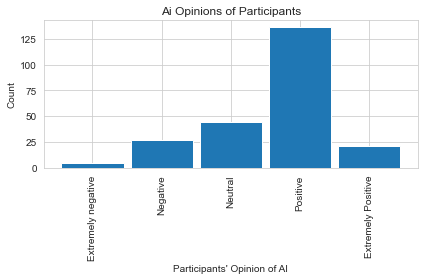

In [14]:
datamap = {
    1: "Extremely negative", 
    2: "Negative", 
    3: "Neutral", 
    4: "Positive", 
    5: "Extremely Positive"
}


aiDF_S['AIrating'] = aiDF_S.ai_opinion_quantised.map(datamap.get)
slimDF['AIrating'] = slimDF.ai_opinion_quantised.map(datamap.get)

key = slimDF['ai_opinion_quantised'].map(datamap.get)

tmp = slimDF.iloc[key.argsort()]
print(tmp.head(5))

df = tmp[['AIrating']]
df2 = df.value_counts().to_frame()
df3 = df2.reset_index(level='AIrating')
# df3 = df3.reset_index(level='gender_id')
# df3 = df3.reset_index(level='gender_id')
df3 = df3.rename(columns={0:'count'})
print(df3.columns.tolist())
print(df3.AIrating.unique())

order = ["Extremely negative", "Negative", "Neutral", "Positive", "Extremely Positive"]
df3.set_index('AIrating').loc[order].plot(kind="bar", y="count", xlabel="Participants' Opinion of AI", ylabel="Count", \
        title="Ai Opinions of Participants", width=0.9, legend=False)


plt.tight_layout()
# plt.legend(loc="upper right")
path = os.path.join(save_path, 'AI_OpinionGraph.png')
plt.savefig(path)
plt.show()

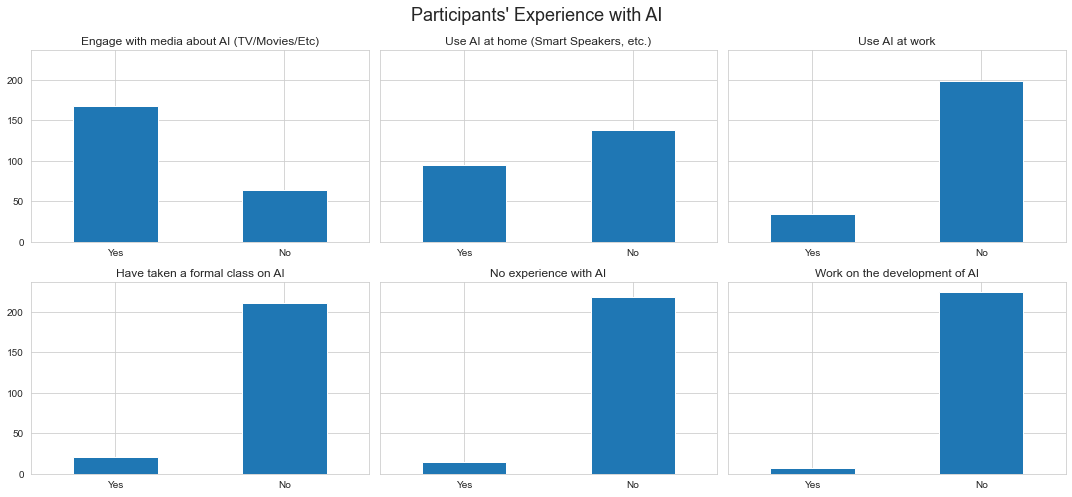

In [26]:
# order = ["Extremely negative", "Negative", "Neutral", "Positive", "Extremely Positive"]
# df3.set_index('AIrating').loc[order].plot

ai_ls = ['MediaAI','HomeAI','AtWorkAI','ClassOnAI','NoneAI','DevelopAI']
ai_t = ['Engage with media about AI (TV/Movies/Etc)','Use AI at home (Smart Speakers, etc.)','Use AI at work',\
        'Have taken a formal class on AI', \
        'No experience with AI', 'Work on the development of AI']
order = [1, 0]

fig, axs = plt.subplots(2, 3, figsize=(15,7), sharey=True)

axs = axs.flatten()

for index, item in enumerate(ai_ls): 
    likertSlim[item].value_counts().loc[order].plot(kind="bar", \
                                                    title=ai_t[index], \
                                                    ax=axs[index], rot=0)
    axs[index].set_xticklabels(["Yes", "No"])
    
fig.suptitle("Participants' Experience with AI", fontsize=18)
    
plt.tight_layout()
path = os.path.join(save_path, 'ParticipantAI_ExperienceGraph.png')
plt.savefig(path)

plt.show()

      ParticipantPrivateID difficulty        visuals   agents  QsTotal  \
index                                                                    
0                3109877.0  Difficult  Blur_Plus_Vis  300_700       20   
76               3330900.0  Difficult        Visuals  s23_p23       20   
74               3255514.0  Difficult  Blur_Plus_Vis  p23_s23       20   
73               3330973.0       Easy  Blur_Plus_Vis   23_700       20   
72               3330898.0       Easy  Blur_Plus_Vis   23_700       20   

       QsCorrect  Agent_QsTotal  Agent_QsCorrect  Agent_QsWO_GhostsTotal  \
index                                                                      
0            5.0             16              4.0                      12   
76          10.0             16              6.0                      12   
74           8.0             16              5.0                      12   
73           8.0             16              5.0                      12   
72           2.0         

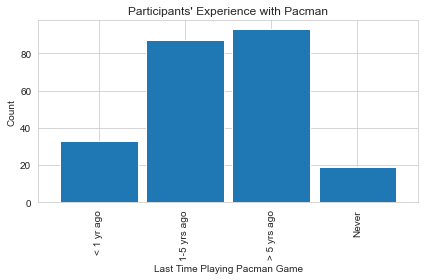

In [16]:
datamap = {
    1: "< 1 yr ago",  
    2: "1-5 yrs ago",  
    3: "> 5 yrs ago",  
    4: "Never"
}


slimDF['PMrating'] = slimDF.pacman_experience_quantised.map(datamap.get)

key = slimDF['pacman_experience_quantised'].map(datamap.get)

pacmanSorted = slimDF.iloc[key.argsort()]
print(pacmanSorted.head(5))

df = pacmanSorted[['PMrating']]
df2 = df.value_counts().to_frame()
df3 = df2.reset_index(level='PMrating')
# df3 = df3.reset_index(level='gender_id')
# df3 = df3.reset_index(level='gender_id')
df3 = df3.rename(columns={0:'count'})
print(df3.columns.tolist())
print(df3.PMrating.unique())

order = ["< 1 yr ago",  "1-5 yrs ago",  "> 5 yrs ago",  "Never"]
df3.set_index('PMrating').loc[order].plot(kind="bar", y="count", xlabel="Last Time Playing Pacman Game", ylabel="Count", \
        title="Participants' Experience with Pacman", width=0.9, legend=False)


plt.tight_layout()
path = os.path.join(save_path, 'PacmanExperienceGraph.png')
plt.savefig(path)

plt.show()

['gender_id', 'PMrating', 'count', 'PacmanExperience']
                  gender_id     PMrating  count PacmanExperience
0                    Female  > 5 yrs ago     52      > 5 yrs ago
1                      Male  1-5 yrs ago     51      1-5 yrs ago
2                      Male  > 5 yrs ago     41      > 5 yrs ago
3                    Female  1-5 yrs ago     35      1-5 yrs ago
4                    Female   < 1 yr ago     16       < 1 yr ago
5                      Male   < 1 yr ago     15       < 1 yr ago
6                    Female        Never     12            Never
7                      Male        Never      7            Never
8   Prefer to self-describe  1-5 yrs ago      1      1-5 yrs ago
9      Prefer not to answer   < 1 yr ago      1       < 1 yr ago
10  Prefer to self-describe   < 1 yr ago      1       < 1 yr ago


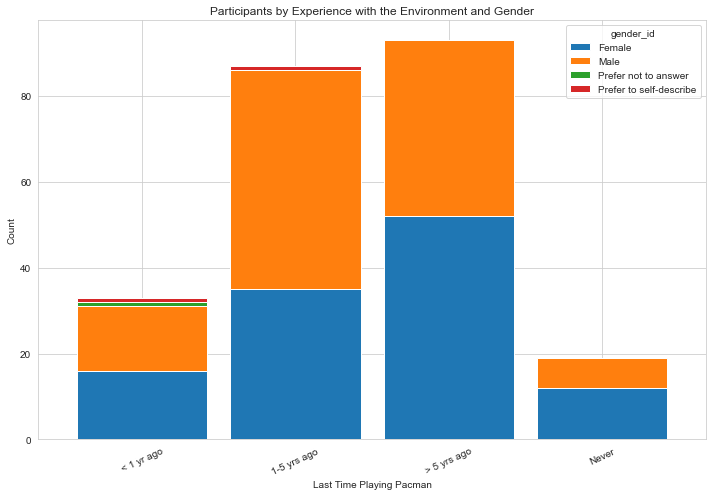

In [19]:
df = pacmanSorted[['PMrating','gender_id']]
df2 = df.value_counts().to_frame()
df3 = df2.reset_index(level='PMrating')
# df3 = df3.reset_index(level='gender_id')
df3 = df3.reset_index(level='gender_id')
df3['PacmanExperience'] = df3['PMrating']
df3 = df3.rename(columns={0:'count'})
print(df3.columns.tolist())
print(df3)


order = ["< 1 yr ago",  "1-5 yrs ago",  "> 5 yrs ago",  "Never"]
df3.set_index('PMrating').pivot('PacmanExperience','gender_id','count').loc[order].plot(kind="bar", \
                                                        figsize=(10,7), width = 0.85, \
                             title="Participants by Experience with the Environment and Gender", ylabel="Count", \
                                        stacked=True, xlabel="Last Time Playing Pacman", rot=25)


# df3.pivot('PacmanExperience','gender_id','count').plot(kind="bar", figsize=(10,7), width = 1.0, \
#                              title="Participants by Age and Gender", ylabel="Count", \
#                                                 xlabel="Age Range", rot=25)

plt.tight_layout()
path = os.path.join(save_path, 'PacmanExperienceByGenderGraph.png')
plt.savefig(path)


plt.show()

F            115
M            114
No Answer      1
Name: gender_rating, dtype: int64


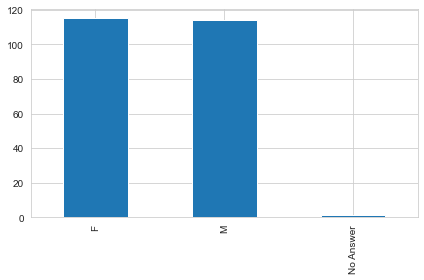

In [17]:
datamap = {
    1: "M",  
    2: "F",  
    3: "No Answer",  
    4: "Other"
}


demoDF_S['gender_rating'] = demoDF_S.gender_id_quantised.map(datamap.get)

print(demoDF_S.gender_rating.value_counts())

fig, ax = plt.subplots()
demoDF_S.gender_rating.value_counts().plot(kind='bar', ax=ax)
## alternatively:
# aiDF_S.groupby(by='AIrating').count().plot(kind='bar', ax=ax)
fig.tight_layout()

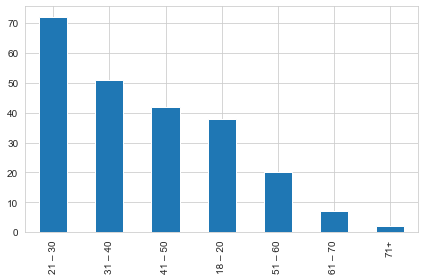

In [36]:
datamap = {
    1: "18 – 20",  
    2: '21 – 30',   
    3: '31 – 40',   
    4: '41 – 50',  
    5: '51 – 60', 
    6: '61 – 70',  
    7: '71+'
}


demoDF_S['age_rating'] = demoDF_S.age_info_quantised.map(datamap.get)

fig, ax = plt.subplots()
demoDF_S.age_rating.value_counts().plot(kind='bar', ax=ax)
## alternatively:
# aiDF_S.groupby(by='AIrating').count().plot(kind='bar', ax=ax)
fig.tight_layout()

path = os.path.join(save_path, 'PacmanExperienceGraph.png')
plt.savefig(path)

['gender_id', 'education', 'count']
                  gender_id                         education  count
0                      Male                   High School/GED     45
1                    Female  College/Undergraduate/University     34
2                    Female                   Graduate School     34
3                    Female                   High School/GED     33
4                      Male  College/Undergraduate/University     31
5                      Male                   Graduate School     28
6                    Female                           College     13
7                      Male                           College      7
8                      Male              Prefer not to answer      2
9   Prefer to self-describe                           College      1
10  Prefer to self-describe  College/Undergraduate/University      1
11     Prefer not to answer                   High School/GED      1
12                   Female            Other (please specify)      

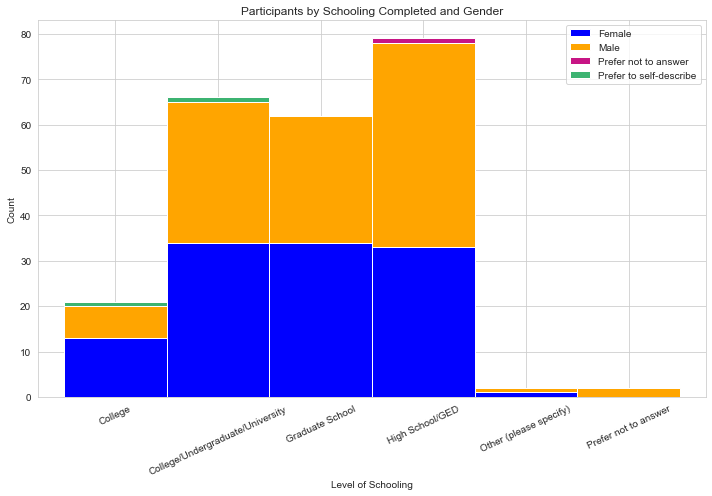

In [37]:
colors=['blue','orange','mediumvioletred','mediumseagreen']



df = demoDF_S[['education_level','gender_id']]
df2 = df.value_counts().to_frame()
df3 = df2.reset_index(level='education_level')
# df3 = df3.reset_index(level='gender_id')
df3 = df3.reset_index(level='gender_id')
df3 = df3.rename(columns={'education_level':'education',0:'count'})
print(df3.columns.tolist())
print(df3)





df3.pivot('education','gender_id','count').plot(kind="bar",stacked=True, figsize=(10,7), color=colors, width = 1.0, \
                             title="Participants by Schooling Completed and Gender", ylabel="Count", \
                                                xlabel="Level of Schooling", rot=25)

plt.tight_layout()
plt.legend(loc="upper right")
path = os.path.join(save_path, 'EducationRangeGenderGraph.png')
plt.savefig(path)
plt.show()

['education_level', 'age', 'count']
                     education_level      age  count
0                    High School/GED  18 – 20     30
1   College/Undergraduate/University  21 – 30     22
2                    Graduate School  31 – 40     22
3                    High School/GED  21 – 30     21
4   College/Undergraduate/University  41 – 50     18
5                    Graduate School  21 – 30     16
6                    Graduate School  41 – 50     13
7                    High School/GED  31 – 40     12
8                            College  21 – 30     12
9   College/Undergraduate/University  31 – 40     12
10                   High School/GED  41 – 50     10
11                   Graduate School  51 – 60      9
12  College/Undergraduate/University  51 – 60      7
13                           College  18 – 20      5
14                           College  31 – 40      4
15                   High School/GED  51 – 60      4
16  College/Undergraduate/University  61 – 70      3
17  Colleg

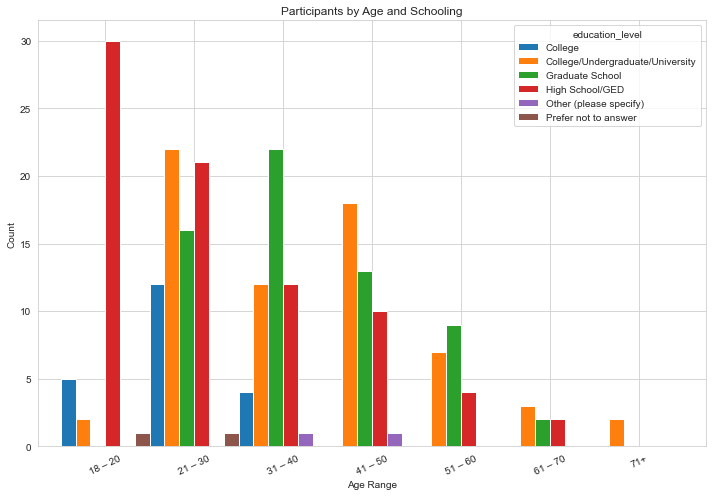

In [39]:
df = demoDF_S[['age_rating','education_level']]
df2 = df.value_counts().to_frame()
df3 = df2.reset_index(level='age_rating')
# df3 = df3.reset_index(level='gender_id')
df3 = df3.reset_index(level='education_level')
df3 = df3.rename(columns={'age_rating':'age',0:'count'})
print(df3.columns.tolist())
print(df3)





df3.pivot('age','education_level','count').plot(kind="bar", figsize=(10,7), width = 1.0, \
                             title="Participants by Age and Schooling", ylabel="Count", \
                                                xlabel="Age Range", rot=25)

plt.tight_layout()
# plt.legend(loc="upper right")
path = os.path.join(save_path, 'AgeRangeEducationGraph.png')
plt.savefig(path)

plt.show()

['gender_id', 'age', 'count']
                  gender_id      age  count
0                    Female  21 – 30     40
1                    Female  31 – 40     31
2                      Male  21 – 30     29
3                      Male  18 – 20     27
4                    Female  41 – 50     22
5                      Male  31 – 40     20
6                      Male  41 – 50     20
7                      Male  51 – 60     12
8                    Female  18 – 20     11
9                    Female  51 – 60      8
10                     Male  61 – 70      4
11                   Female  61 – 70      3
12  Prefer to self-describe  21 – 30      2
13                     Male      71+      2
14     Prefer not to answer  21 – 30      1


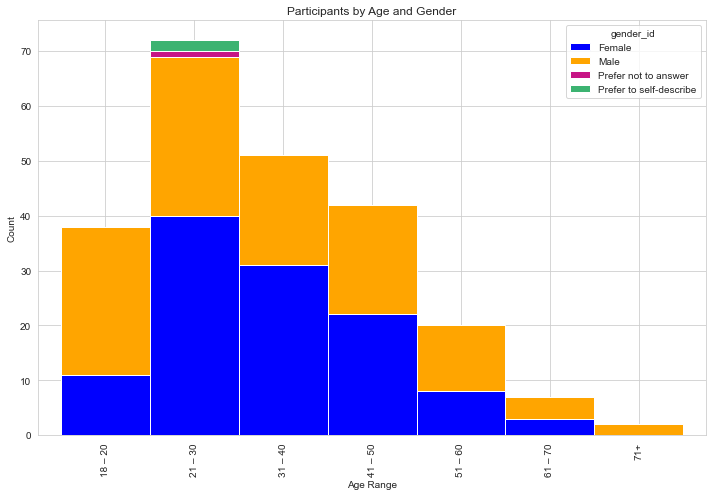

In [41]:
df = demoDF_S[['age_rating','gender_id']]
df2 = df.value_counts().to_frame()
df3 = df2.reset_index(level='age_rating')
# df3 = df3.reset_index(level='gender_id')
df3 = df3.reset_index(level='gender_id')
df3 = df3.rename(columns={'age_rating':'age',0:'count'})
print(df3.columns.tolist())
print(df3)





df3.pivot('age','gender_id','count').plot(kind="bar",stacked=True, figsize=(10,7), color=colors, width = 1.0, \
                             title="Participants by Age and Gender", ylabel="Count", xlabel="Age Range")

plt.tight_layout()
# plt.legend(loc="upper right")
path = os.path.join(save_path, 'AgeRangeGenderGraph.png')
plt.savefig(path)
plt.show()

In [ ]:
df = demoDF_S.groupby('age_rating')['gender_id'].value_counts().to_frame()
# print(df)
# df[['gender_id','count']] = df['gender_id'].astype(str).str.split(' ', expand=True, n=2)
df['count'] = df['gender_id'].astype(str).str.split(' ', expand=True, n=1).astype(int)
# print(df['gender_id'].astype(str).str.split(' ', expand=True, n=2).columns.tolist())
# print(df.drop(columns=['gender_id']))
# print(df.get_level_values(0))
# df.reset_index().rename({'gender_id':'index1'}, axis = 'columns')


reset_indx1 = df.reset_index(level='age_rating')
reset_indx1 = reset_indx1.drop(columns=['gender_id']).reset_index(level='gender_id')
print(reset_indx1.set_index('gender_id'))





# print(df.columns.tolist())

ax = sns.barplot(data = reset_indx1, y="count", x="age_rating", hue="gender_id", dodge=True, orient="v")
ax.set_ylabel("Count")
ax.set_xlabel("Age Range")
ax.set_title("Participants by Gender and Age Range")
plt.tight_layout()
plt.legend(loc="upper right")
# plt.savefig('/Users/brittdavis/iCloud/Documents/School/Thesis/AgeRangeGenderGraph.png')
plt.show()


# reset_indx1.set_index('gender_id').plot(kind="bar",stacked=True, figsize=(10,7), color=colors, width = 1.0, \
#                              title="Participants by Age and Gender", ylabel="Count")

In [ ]:
slimDF.columns.tolist()

['gender_id', 'Current Country of Residence', 'count']
                  gender_id Current Country of Residence  count
0                    Female               United Kingdom     34
1                      Male                     Portugal     23
2                    Female                     Portugal     18
3                      Male               United Kingdom     14
4                      Male                       Poland     12
5                    Female                United States     11
6                    Female                       Mexico     10
7                      Male                       Mexico      8
8                    Female                       Poland      7
9                      Male                       Canada      7
10                     Male                        Italy      7
11                     Male                        Chile      6
12                     Male                       Greece      5
13                   Female                      

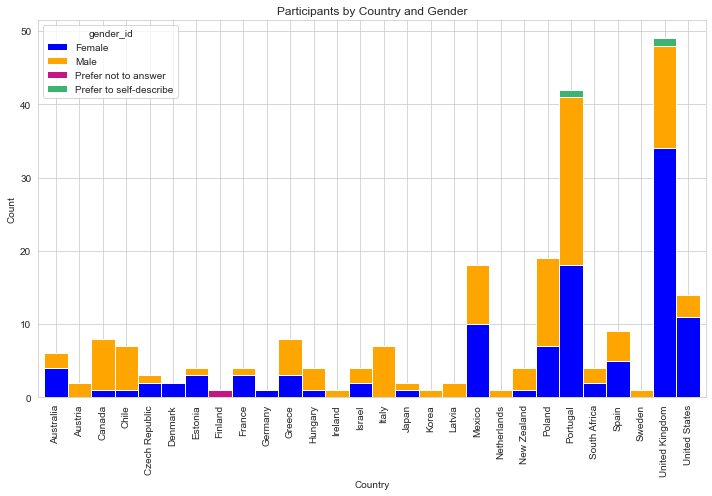

In [45]:
df = slimDF[['Current Country of Residence', 'gender_id']]
df2 = df.value_counts().to_frame()
df3 = df2.reset_index(level='Current Country of Residence')
df3 = df3.reset_index(level='gender_id')
# df3 = df3.reset_index(level='gender_id')
df3 = df3.rename(columns={0:'count'})
print(df3.columns.tolist())
print(df3)

df3['country'] = df3['Current Country of Residence']

df3.pivot('country','gender_id','count').plot(kind="bar",stacked=True, figsize=(10,7), color=colors, width = 1.0, \
                             title="Participants by Country and Gender", ylabel="Count", xlabel="Country")

plt.tight_layout()
# plt.legend(loc="upper right")
path = os.path.join(save_path, 'CountryAndGenderGraph.png')
plt.savefig(path)

plt.show()

In [ ]:
print(slimDF.ai_involvement_text.unique())

In [ ]:
tmp = slimDF[['MediaAI','HomeAI','AtWorkAI','ClassOnAI','DevelopAI','NoneAI','OtherAI']]
# print(tmp)
print(tmp.value_counts().to_frame())

# print(tmp)
print(tmp.index)

# tmp.T.plot(kind="hist")
# ax = tmp.groupby('gender_id_quantised').mean().plot(kind="bar", stacked=True, figsize=(15,8))
# ax.set_xticklabels(['male','female','NA'])

# print(slimDF.ai_involvement_text.unique())

In [ ]:
cols = slimDF.columns.tolist()
print(cols)

['AIrating', 'count']
             AIrating  count
0            Positive    136
1             Neutral     44
2            Negative     27
3  Extremely Positive     21
4  Extremely negative      4


<AxesSubplot:title={'center':'Ai Opinions of Participants'}, xlabel="Participants' Opinion of AI", ylabel='Count'>

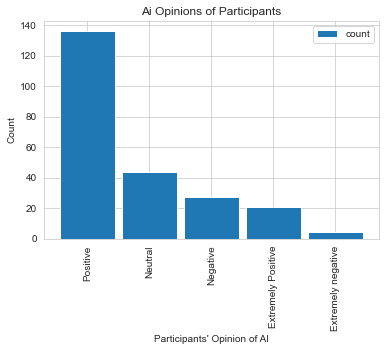

In [46]:
df = slimDF[['AIrating']]
df2 = df.value_counts().to_frame()
df3 = df2.reset_index(level='AIrating')
# df3 = df3.reset_index(level='gender_id')
# df3 = df3.reset_index(level='gender_id')
df3 = df3.rename(columns={0:'count'})
print(df3.columns.tolist())
print(df3)

df3.plot(kind="bar", x="AIrating", y="count", xlabel="Participants' Opinion of AI", ylabel="Count", \
        title="Ai Opinions of Participants", width=0.9)



# df3.pivot('education','gender_id','count').plot(kind="bar",stacked=True, figsize=(10,7), color=colors, width = 1.0, \
#                              title="Participants by Schooling Completed and Gender", ylabel="Count", \
#                                                 xlabel="Level of Schooling", rot=25)

# plt.tight_layout()
# plt.legend(loc="upper right")
# plt.savefig('/Users/brittdavis/iCloud/Documents/School/Thesis/EducationRangeGenderGraph.png')
# plt.show()

['Student Status', 'Employment Status', 'count']
0             Full-Time
1                 Other
2             Part-Time
3           Job-seeking
4             Full-Time
5      Not in paid work
6           Job-seeking
7             Part-Time
8      Not in paid work
9                 Other
10    Staring a new job
11         DATA EXPIRED
12         DATA EXPIRED
15    Staring a new job
Name: Employment Status, dtype: object
Student Status     No  Yes  tot
Employment Status              
Staring a new job   1    4    5
DATA EXPIRED        3    3    6
Not in paid work   15    9   24
Other               6   21   27
Job-seeking        14   17   31
Part-Time          20   11   31
Full-Time          78   15   93


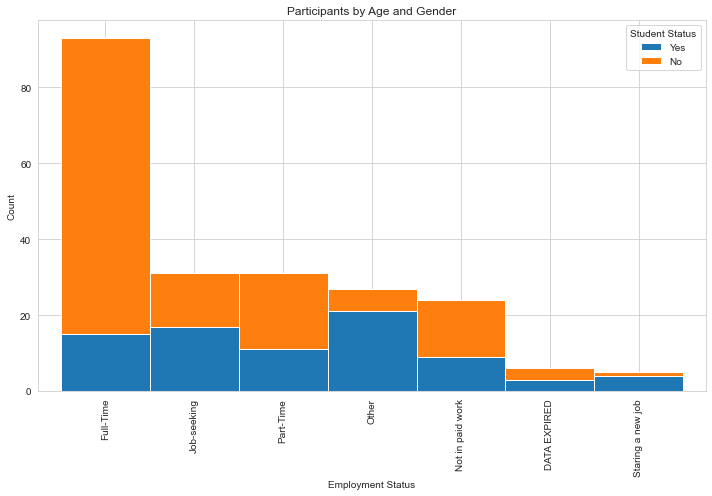

In [47]:
df = slimDF[['Employment Status','Student Status']]
df2 = df.value_counts().to_frame()
df3 = df2.reset_index(level='Employment Status')
# df3 = df3.reset_index(level='gender_id')
df3 = df3.reset_index(level='Student Status')
df3 = df3.rename(columns={0:'count'})
print(df3.columns.tolist())

df3 = df3[df3['Employment Status'] != "Greece"]
df3 = df3[df3['Employment Status'] != "Portugal"]
df3 = df3[df3['Employment Status'] != "Chile"]
df3 = df3[df3['Employment Status'] != "Israel"]

df3['Employment Status'] = np.where(df3['Employment Status'] == "Due to start a new job within the next month", "Staring a new job", \
                                   np.where(df3['Employment Status'] == "Unemployed (and job seeking)", "Job-seeking", \
                                            np.where(df3['Employment Status'] == "Not in paid work (e.g. homemaker', 'retired or disabled)", \
                                                     "Not in paid work", \
                                           df3['Employment Status'])))

print(df3['Employment Status'])

df4 = df3.sort_values('count', ascending=True).pivot('Employment Status','Student Status','count')

df4['tot'] = df4['No'] + df4['Yes']
print(df4.sort_values('tot'))



df4.sort_values('tot', ascending=False)[['Yes','No']].plot(kind="bar",stacked=True, figsize=(10,7), width = 1.0, \
                             title="Participants by Age and Gender", ylabel="Count", xlabel="Employment Status")

plt.tight_layout()
# plt.legend(loc="upper right")
path = os.path.join(save_path, 'EmploymentStudentGraph.png')


plt.savefig(path)
plt.show()

In [45]:
likertSlim['ag_correctedPerc'] = likertSlim['1_2_correctedPerc']

tmp = likertSlim[['MediaAI','HomeAI','AtWorkAI','ClassOnAI','DevelopAI','NoneAI','OtherAI',\
                  'tot_correctedPerc','ag_correctedPerc','Qs1_CorrectedPerc','Qs2_CorrectedPerc',\
                 'comp_correctedPerc','likert1Mode_Z','likert2Mode_Z','likertMode_Z','CompResponseMode_Z',\
                 'likertMode_All_Z']]

In [30]:
def fancyWilcoxon(a,b,df):
    data1 = df[a]
    data2 = df[b]
    print("\n" + str(a) + ' ' + str(stats.tmean(df[a])) + ' ' + str(stats.tstd(df[a])))
    print(str(b) + ' ' + str(stats.tmean(df[b])) + ' ' + str(stats.tstd(df[b])))
    # Calculate the Wilcoxon signed-rank test.
    return(wilcoxon(data1, data2))

In [33]:
tmp

,MediaAI,HomeAI,AtWorkAI,ClassOnAI,DevelopAI,NoneAI,OtherAI,tot_correctedPerc,1_2_correctedPerc,Qs1_CorrectedPerc,Qs2_CorrectedPerc,comp_correctedPerc,likert1Mode_Z,likert2Mode_Z,likertMode_Z,CompResponseMode_Z,likertMode_All_Z
index,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,16.785714,20.982143,16.964286,25.000000,0.0,1.224745,1.224745,1.224745,-1.224745,0.000000
1,0,0,1,1,0,0,0,5.000000,6.250000,0.000000,12.500000,0.0,0.654654,0.654654,0.654654,0.654654,0.654654
2,0,1,0,1,0,0,0,18.000000,22.500000,28.750000,16.250000,0.0,-1.053609,0.862044,0.862044,-0.095783,0.862044
3,1,0,0,1,0,0,0,31.785714,27.232143,16.964286,37.500000,50.0,-0.730096,-0.730096,-0.730096,0.862840,0.862840
4,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,-1.336306,-0.534522,-1.336306,1.069045,1.069045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0,1,1,0,0,0,0,37.035714,33.794643,46.875000,20.714286,50.0,0.685994,-0.171499,-0.171499,0.685994,0.685994
228,1,1,0,0,0,0,0,23.035714,28.794643,32.589286,25.000000,0.0,0.272727,-1.545455,-0.636364,1.181818,0.272727
229,1,0,0,0,0,0,0,54.285714,55.357143,62.500000,48.214286,50.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [47]:
# Note that the three terms returned are X² statistic, p-value, and degree of freedom
def testChiCorr(a,b,c):
    ct = pd.crosstab(c[a], c[b], margins=True)
    ar = []
    for i in range(0, len(ct)-1):
        ar.append(list(ct.iloc[i][0:-1].values))
    obs = np.array(ar)
    X, p, degF = stats.chi2_contingency(obs)[0:3]
    if (p<=0.05):
        print("\n")
        print(str(a) + " " + str(stats.tmean(c[a])) + " " + str(stats.tstd(c[a])))
        print(str(b) + " " + str(stats.tmean(c[b])) + " " + str(stats.tstd(c[b])))
        print("p: ", p)
#     else:
#         print("\n"+ str(a) + " " + str(b))
    return(X, degF, p)

In [70]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import kurtosis, skew
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon

# Logistic
pVal = 0.01
rAdj = 0.05

ai_ls = ['MediaAI','HomeAI','AtWorkAI','ClassOnAI','DevelopAI','NoneAI','OtherAI']
# p_ls = ['tot_correctedPerc','ag_correctedPerc','Qs1_CorrectedPerc','Qs2_CorrectedPerc',\
#                  'comp_correctedPerc','likert1Mode_Z','likert2Mode_Z','likertMode_Z','CompResponseMode_Z',\
#                  'likertMode_All_Z']

p_ls = ['tot_correctedPerc','ag_correctedPerc','likertMode_All_Z']

df = tmp.copy()


for measure in p_ls:
    for item in ai_ls:
        a = item
        b = measure
#         print(fancyWilcoxon(a,b,df))
        
#         print("chi: ")
#         print(testChiCorr(a,b,df))
    
        f_rev1 = item + " ~ " + measure
        est = smf.ols(formula=f_rev1, data=df).fit()
        if est.f_pvalue < 0.05 and est.rsquared_adj > rAdj:
            print('Summary: \n', est.summary())
            
        print("And kw: ")
        print(a, b)
        print(stats.kruskal(df[df[item]==0][measure],
                       df[df[item]==1][measure]))
        print()
        print("T-tests: ")
        print(stats.ttest_ind(df[a], df[b]))
        print()

And kw: 
MediaAI tot_correctedPerc
KruskalResult(statistic=0.025529622785037717, pvalue=0.8730544424898075)

T-tests: 
Ttest_indResult(statistic=-26.752969948198494, pvalue=6.286293263433859e-96)

And kw: 
HomeAI tot_correctedPerc
KruskalResult(statistic=7.183325762325022, pvalue=0.007358418307206354)

T-tests: 
Ttest_indResult(statistic=-27.081447692020596, pvalue=2.000846258739662e-97)

And kw: 
AtWorkAI tot_correctedPerc
KruskalResult(statistic=0.3374290082881483, pvalue=0.5613170197225072)

T-tests: 
Ttest_indResult(statistic=-27.357263208620726, pvalue=1.1150011010986526e-98)

And kw: 
ClassOnAI tot_correctedPerc
KruskalResult(statistic=0.15107614206966652, pvalue=0.6975090724471978)

T-tests: 
Ttest_indResult(statistic=-27.41817109669161, pvalue=5.898946974114646e-99)

And kw: 
DevelopAI tot_correctedPerc
KruskalResult(statistic=0.4176036272252397, pvalue=0.5181352160867351)

T-tests: 
Ttest_indResult(statistic=-27.484228584810772, pvalue=2.958447337835131e-99)

And kw: 
NoneAI t

232
232


/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='HomeAI', ylabel='ag_correctedPerc'>

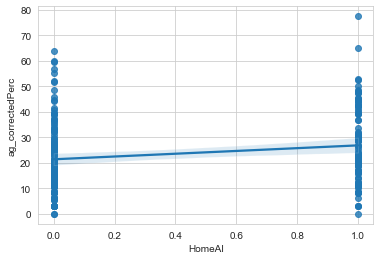

In [86]:
print(len(df['DevelopAI'].dropna()))
print(len(df['likertMode_All_Z'].dropna()))

sns.regplot('HomeAI', 'ag_correctedPerc', data=df)

/Users/brittdavis/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='HomeAI', ylabel='tot_correctedPerc'>

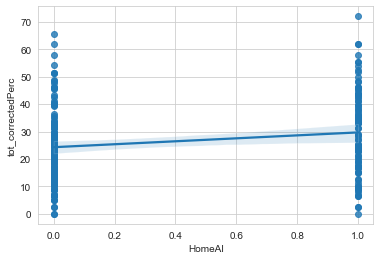

In [87]:
sns.regplot('HomeAI', 'tot_correctedPerc', data=df)

In [62]:
print("And kw: ")
stats.kruskal(df[df['MediaAI']==0]['tot_correctedPerc'],
               df[df['MediaAI']==1]['tot_correctedPerc'])

And kw: 


KruskalResult(statistic=0.025529622785037717, pvalue=0.8730544424898075)

In [92]:
df = df.apply(pd.to_numeric)
print(df.info())
for measure in p_ls:
    for item in ai_ls:
        print("predictions for  " + str(measure))
        myStr = item
    #     myStr = 'likertMode_Z'
        form = measure + " ~ " + myStr
        mod = ols(form, data=df).fit()
        aov_table = sm.stats.anova_lm(mod, typ=2)
        print("ANOVA: ")
        print(aov_table)

    #     # Pair-wise t-test (independent) on totPerc v visuals
    #     pair_t = mod.t_test_pairwise('C(HomeAI)', method="holm")
    #     print('pair_t')
    #     # print(pair_t)
    #     print("{{{{{{{}}}}}}}")
    #     pairwiseResults = pair_t.result_frame
    #     pairwiseResults['new'] = pairwiseResults.index
    #     new = pairwiseResults.new.str.split("-", n = 3, expand = True)
    #     pairwiseResults['A'] = new[0]
    #     pairwiseResults['B'] = new[1]
    #     pairwiseResults.set_index('A', inplace=True)
    #     pairwiseResults.drop(columns=['Conf. Int. Low','Conf. Int. Upp.','P>|t|','new', 'reject-holm'], inplace=True)
    #     pairwiseResults = pairwiseResults[['B', 'coef' ,  'std err' ,  't'  , 'pvalue-holm']]
    #     pairwiseResults = pairwiseResults.round(decimals=3)
    #     # print(pairwiseResults)
    #     # for i in pairwiseResults.columns.tolist():
    #     #     print(pairwiseResults[i].values)
    #     print(pairwiseResults)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 231
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MediaAI             232 non-null    int64  
 1   HomeAI              232 non-null    int64  
 2   AtWorkAI            232 non-null    int64  
 3   ClassOnAI           232 non-null    int64  
 4   DevelopAI           232 non-null    int64  
 5   NoneAI              232 non-null    int64  
 6   OtherAI             232 non-null    int64  
 7   tot_correctedPerc   232 non-null    float64
 8   ag_correctedPerc    232 non-null    float64
 9   Qs1_CorrectedPerc   232 non-null    float64
 10  Qs2_CorrectedPerc   232 non-null    float64
 11  comp_correctedPerc  232 non-null    float64
 12  likert1Mode_Z       232 non-null    float64
 13  likert2Mode_Z       232 non-null    float64
 14  likertMode_Z        232 non-null    float64
 15  CompResponseMode_Z  232 non-null    float64
 16  likertMo